# Logistic Regression Exercise | Advertising
**Author: ** *Gilberto Diaz*
<hr>
In this exercise I'm going to try to create a model that will predict whether or not they will click on an ad.
<br>
The data set contains the following features:

Feature|Description
----|----
Daily Time Spent on Site|consumer time on site in minutes
Age|customer age in years
Area Income|avg income of geographical area of customer
Daily Internet Usage| avg minutes a day consumer is on the internet
Ad Topic Line|headline of the advertisement
City|city of consumer
Male|whether or not consumer was male
Country|country of consumer
Timestamp|time at which consumer clicked on Ad or closed window
Clicked on Ad|0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

In [2]:
%matplotlib inline

In [3]:
dims = (11.5, 8.5)
plt.rcParams["patch.force_edgecolor"] = True
sb.set_style("whitegrid")

In [4]:
data = pd.read_csv('./advertising.csv')
data.shape

(1000, 10)

In [5]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Let's determine which colomns could be used as predictors.

In [6]:
len(data['Ad Topic Line'].unique())

1000

The `Ad Topic Line` can't be used as a predictor.

In [7]:
len(data['City'].unique())

969

Almost all `City` are unique. I don't think it will help in the model.

In [8]:
len(data['Country'].unique())

237

Almost `~25%` of the `Country` column are unique. It is a good feature to be include.

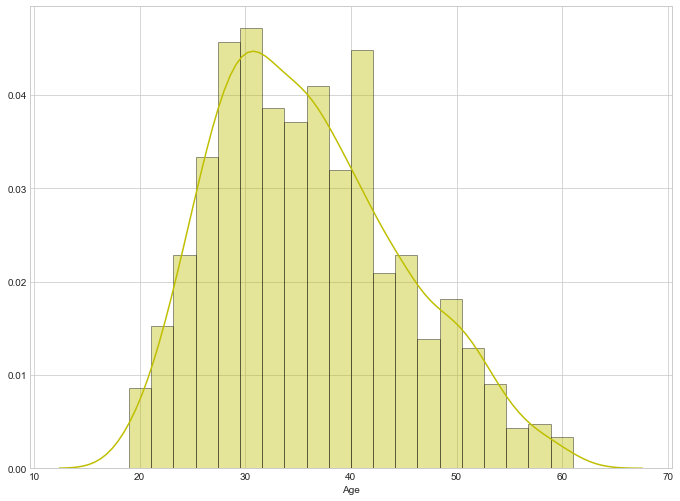

In [9]:
plt.figure(figsize=dims)
sb.distplot(data['Age'], bins=20, color='y')

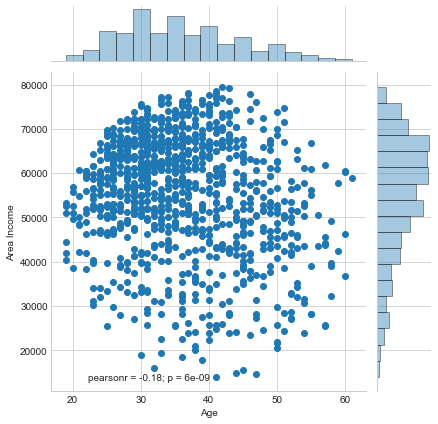

In [10]:
plt.figure(figsize=dims)
sb.jointplot(x='Age', y='Area Income', data=data)

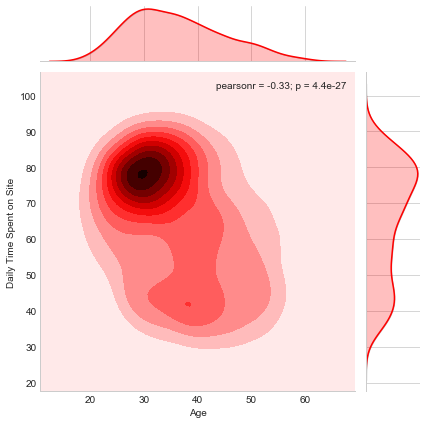

In [11]:
plt.figure(figsize=dims)
sb.jointplot(y='Daily Time Spent on Site', x='Age', data=data, kind='kde', color='r')

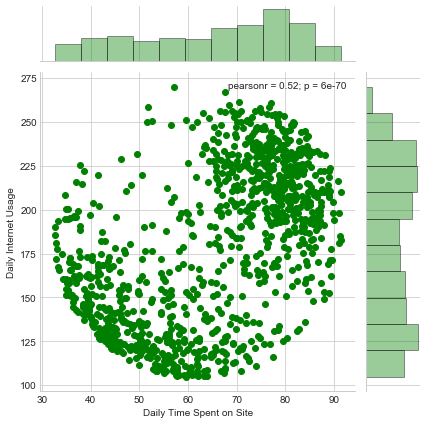

In [12]:
plt.figure(figsize=dims)

sb.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=data, color='g')

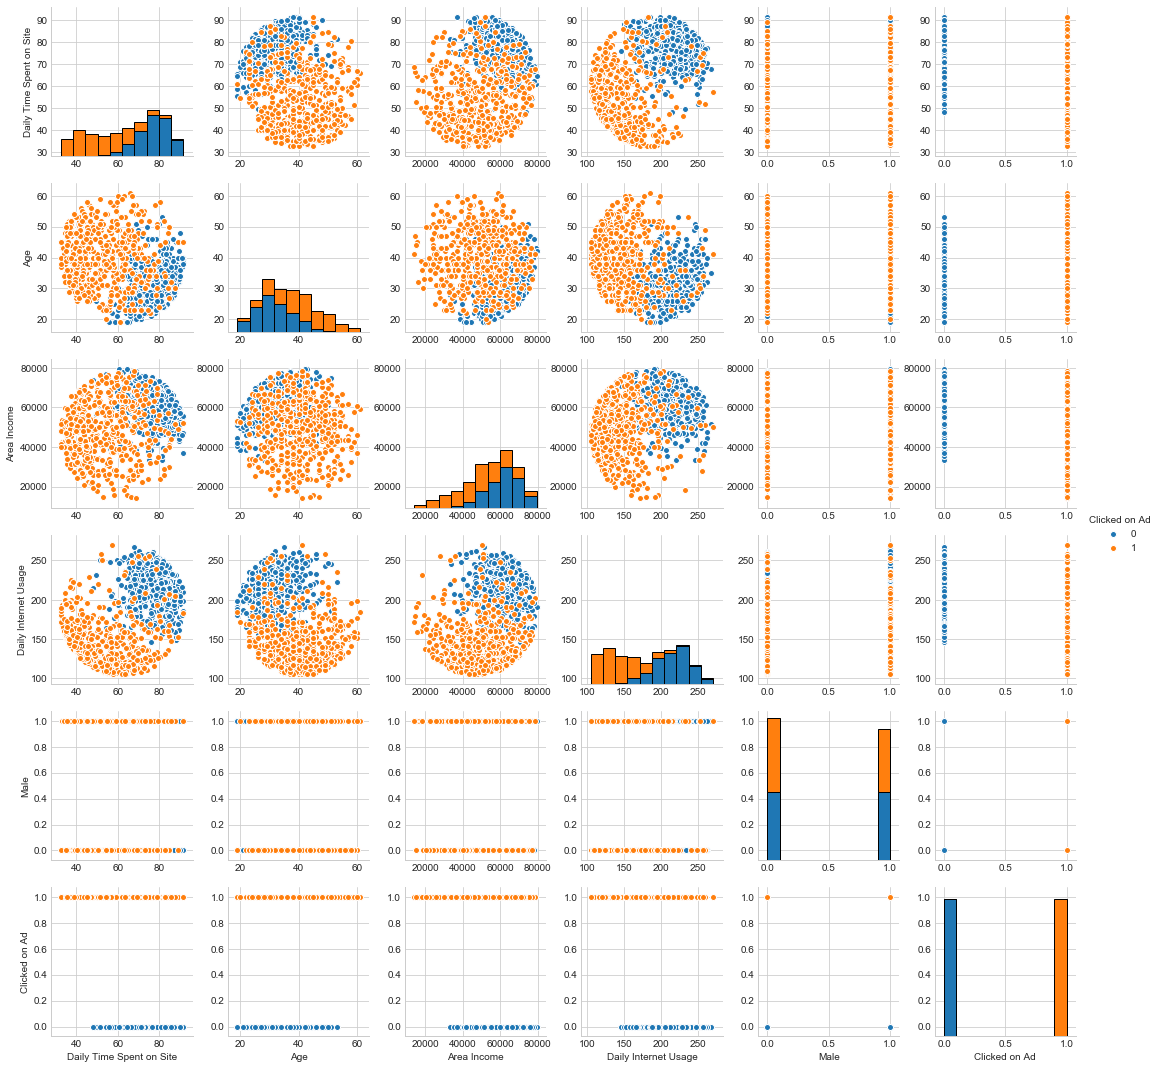

In [13]:
plt.figure(figsize=dims)
sb.pairplot(data, hue='Clicked on Ad')

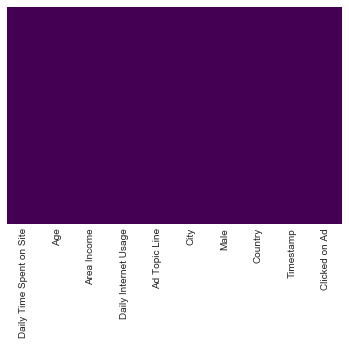

In [14]:
sb.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

No missing values.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [16]:
data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [17]:
data_to_train = data.drop(['Area Income', 'City', 'Ad Topic Line', 'Timestamp'], axis=1)

In [18]:
data_to_train.head()

,Daily Time Spent on Site,Age,Daily Internet Usage,Male,Country,Clicked on Ad
0,68.95,35,256.09,0,Tunisia,0
1,80.23,31,193.77,1,Nauru,0
2,69.47,26,236.50,0,San Marino,0
3,74.15,29,245.89,1,Italy,0
4,68.37,35,225.58,0,Iceland,0


In [19]:
country = pd.get_dummies(data_to_train['Country'])

In [20]:
data_to_train = pd.concat([country, data_to_train], axis=1)
data_to_train.drop(['Country'], axis=1, inplace=True)
data_to_train.head()

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica (the territory South of 60 deg S),Antigua and Barbuda,Argentina,...,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe,Daily Time Spent on Site,Age,Daily Internet Usage,Male,Clicked on Ad
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,68.95,35,256.09,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,80.23,31,193.77,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,69.47,26,236.50,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,74.15,29,245.89,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,68.37,35,225.58,0,0


In [21]:
X = data_to_train.drop('Clicked on Ad', axis=1)
y = data_to_train['Clicked on Ad']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [23]:
lrmodel = LogisticRegression()

In [24]:
lrmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
predictions = lrmodel.predict(X_test)

In [26]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.92      0.95      0.94       153
          1       0.95      0.92      0.93       147

avg / total       0.94      0.94      0.94       300



Something really interesting I found is that the prediction performed better without the `Area Income` column. With the `Area Income`, the precision and recall are around `~90%`. Without, precision and recall are `~94%`. I founded out by accident.